## Data Cleaning Error Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Daten laden

In [2]:
cleaning = pd.read_parquet('./data/cleaning_analysis.parquet')

In [3]:
cleaning['correct_cleaning'] = (cleaning['unknown'] == cleaning['clean']).replace({True: 1, False: 0})

## Daten analysieren

In [4]:
cleaning

,series_id,step,timestamp,anglez,enmo,unknown,clean,correct_cleaning
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,0,0,1
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,0,0,1
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,0,0,1
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,0,0,1
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,0,0,1
...,...,...,...,...,...,...,...,...
124822075,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204,1,0,0
124822076,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233,1,0,0
124822077,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202,1,0,0
124822078,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199,1,0,0


In [5]:
whole_size = len(cleaning)
cleaned_size = len(cleaning[cleaning.clean == 1])

percentage_cleaned = cleaned_size / whole_size

print(whole_size)
print(cleaned_size)
print(percentage_cleaned * 100, '%')

124822080
17706960
14.185759442560162 %


## Daten visualisieren

In [6]:
participant_series_id = '3318a0e3ed6f'

participant_cleaning = cleaning[cleaning.series_id == participant_series_id].copy()

C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

<Axes: xlabel='step', ylabel='anglez'>

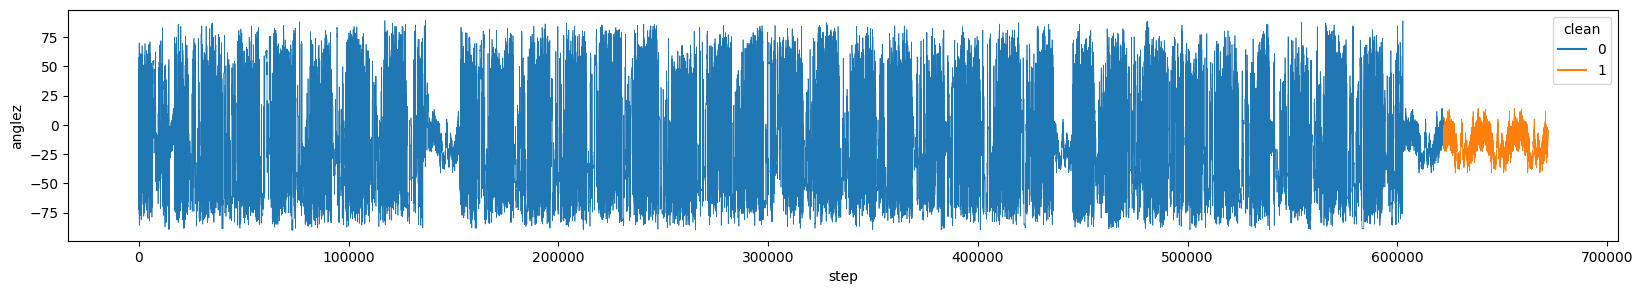

In [7]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.lineplot(data=participant_cleaning, x="step", y="anglez", hue="clean", linewidth = 0.5)

C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

<Axes: xlabel='step', ylabel='anglez'>

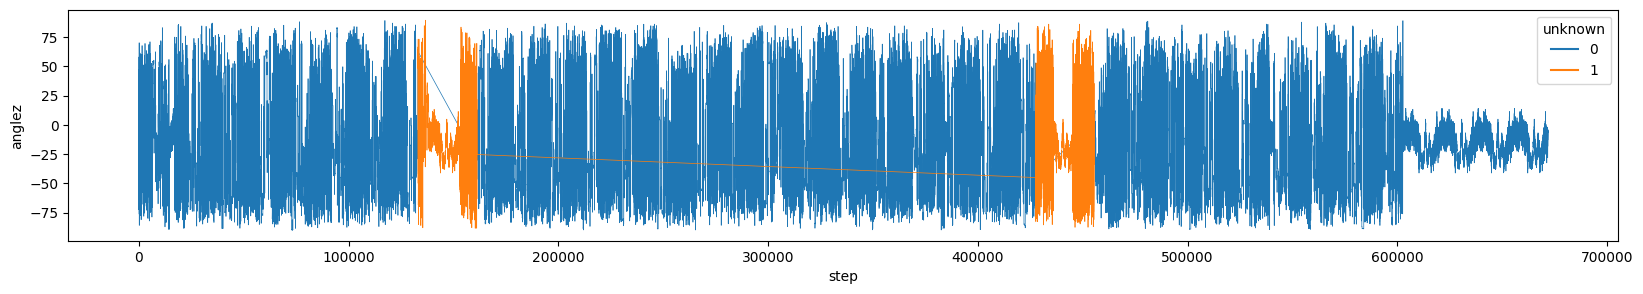

In [8]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.lineplot(data=participant_cleaning, x="step", y="anglez", hue="unknown", linewidth = 0.5)

## Accuracy pro Serie

In [9]:
series = cleaning.series_id.unique()

Text(0.5, 0, 'Series')

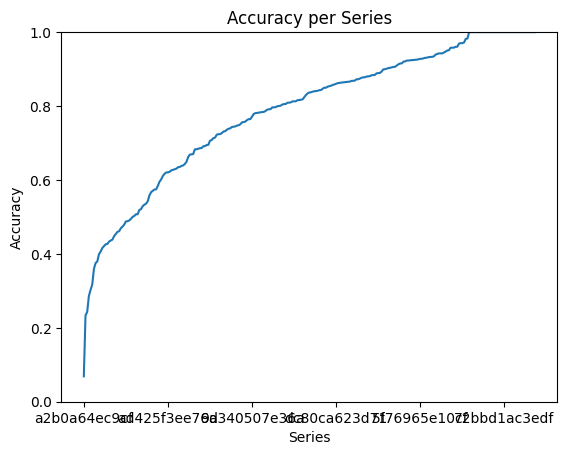

In [10]:
ax = cleaning.groupby('series_id')['correct_cleaning'].mean().sort_values().plot(
    ylim=(0, 1), title='Accuracy per Series'
)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Series")

In [11]:
cleaning.groupby('series_id')['correct_cleaning'].mean().sort_values()

series_id
a2b0a64ec9cf    0.068619
3a9a9dc2cbd9    0.233401
3be2f86c3e45    0.242947
062dbd4c95e6    0.286015
b84960841a75    0.302657
                  ...   
3664fe9233f9    1.000000
349c5562ee2c    1.000000
8e32047cbc1f    1.000000
76237b9406d5    1.000000
c6788e579967    1.000000
Name: correct_cleaning, Length: 269, dtype: float64

## Series with potentialy wrong cleaning

In [12]:
cleaning[(cleaning.clean == 1) & (cleaning.unknown == 0)]

,series_id,step,timestamp,anglez,enmo,unknown,clean,correct_cleaning
26685000,3318a0e3ed6f,622080,2018-06-23T12:30:00-0400,-15.776200,0.1501,0,1,0
26685001,3318a0e3ed6f,622081,2018-06-23T12:30:05-0400,-13.352700,0.2000,0,1,0
26685002,3318a0e3ed6f,622082,2018-06-23T12:30:10-0400,-7.284000,0.1798,0,1,0
26685003,3318a0e3ed6f,622083,2018-06-23T12:30:15-0400,-12.708300,0.1582,0,1,0
26685004,3318a0e3ed6f,622084,2018-06-23T12:30:20-0400,-18.426901,0.1567,0,1,0
...,...,...,...,...,...,...,...,...
105954295,dff367373725,34555,2018-04-08T15:44:35-0400,-29.647900,0.0917,0,1,0
105954296,dff367373725,34556,2018-04-08T15:44:40-0400,-29.659800,0.1151,0,1,0
105954297,dff367373725,34557,2018-04-08T15:44:45-0400,-36.310699,0.1002,0,1,0
105954298,dff367373725,34558,2018-04-08T15:44:50-0400,-40.204201,0.0923,0,1,0
